In [32]:
import pandas as pd

In [34]:
df = pd.read_csv("D:/Projects/FinanceForgery/Fraud.csv")
df.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [35]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df['nameOrig_encoded'] = le.fit_transform(df['nameOrig'])
df['nameDest_encoded'] = le.fit_transform(df['nameDest'].astype(str))

df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['transaction_amount_change'] = df['oldbalanceDest'] - df['newbalanceDest']
df['large_transaction_flag'] = df['amount'] > 200

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_change', 
            'transaction_amount_change', 'large_transaction_flag', 
            'nameOrig_encoded', 'nameDest_encoded', 'type_encoded', 'isFlaggedFraud']
X = df[features]
y = df['isFraud']

In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.93      0.74      0.83      2045

    accuracy                           1.00   1590655
   macro avg       0.96      0.87      0.91   1590655
weighted avg       1.00      1.00      1.00   1590655


Confusion Matrix:
[[1588492     118]
 [    522    1523]]
Accuracy: 0.9996

ROC-AUC: 0.9887


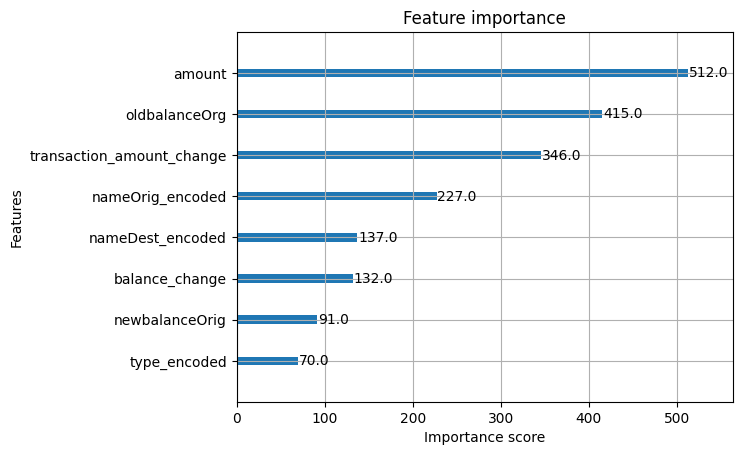

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC: {roc_auc:.4f}")
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()